In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_points = 1000
batch_size = 10
num_batches = num_points // batch_size
num_dims = 2

In [10]:
group_0 = np.random.normal(loc=0, size=[num_points, num_dims])
group_1 = np.random.normal(loc=2, size=[num_points, num_dims])

zeros = np.zeros(shape=[num_points, 1])
ones = np.ones(shape=[num_points, 1])

group_0 = np.append(group_0, zeros, axis=1)
group_1 = np.append(group_1, ones, axis=1)

data = np.concatenate([group_0, group_1])
np.random.shuffle(data)

expected = data[:,2]
sample_data = data[:, [0,1]]

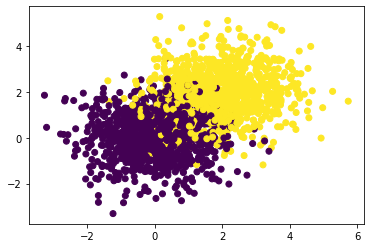

In [11]:
plt.scatter(data[:,0], data[:,1], c=expected)

In [12]:
data[:,[0,1]]

array([[ 0.86731361, -0.59410512],
       [ 0.46455129, -1.28725381],
       [ 4.43484517,  1.89606671],
       ...,
       [ 0.74291095,  0.5110391 ],
       [ 2.56057996,  1.30405208],
       [ 3.41349056,  0.83060825]])

In [13]:
class Perceptron:

    def __init__(self, data):
        self.w = np.random.uniform(-1, 1, size=[num_dims + 1,])
        self.l_rate = 0.5
        self.num_epochs = 10
        self.num_points = len(data)
        
        num_train_points = round(self.num_points * 0.75)
        self.train_data = data[:num_train_points]
        self.test_data = data[num_train_points:]

    def predict(self, x):
        total = self.w[0]

        for ind, el in enumerate(x):
            total += self.w[ind + 1] * el

        if total > 0:
            return 1
        else:
            return 0
    
    def train(self):
        for _ in range(self.num_epochs):
            for row_ind, row in enumerate(self.train_data):
                train_row = row[:-1]
                expected = self.train_data[row_ind, -1]
                prediction = self.predict(train_row)

                error = expected - prediction

                self.w[1:] += self.l_rate * error * train_row
                self.w[0] += self.l_rate * error
    
    def test(self):
        total_correct = 0
        for row_ind, row in enumerate(self.test_data):
            train_row = row[:-1]
            expected = self.test_data[row_ind, -1]
            prediction = self.predict(train_row)

            total_correct += 1 if expected == prediction else 0
    
        accuracy = total_correct / len(self.test_data) * 100
    
        print(f'Accuracy: {accuracy}%')

In [14]:
model = Perceptron(data)

In [15]:
model.train()

In [16]:
model.test()

Accuracy: 88.6%
